/tmp/ipykernel_69261/1498866158.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


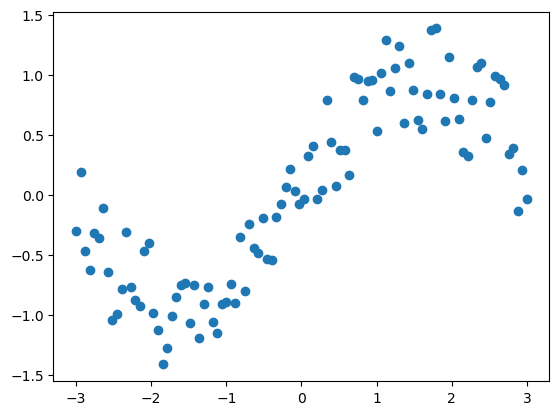

In [1]:
# create toy data

import matplotlib.pyplot as plt
import numpy as np

plt.ion()

n_observation = 100

fig, ax = plt.subplots(1,1)
xs = np.linspace(-3,3,n_observation)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observation)
ax.scatter(xs, ys)
fig.show()
plt.draw()

In [20]:
import tensorflow as tf


W = tf.Variable(tf.random.normal([1], dtype=tf.float32), name='weight')
b = tf.Variable(tf.random.normal([1], dtype=tf.float32), name='bias')


@tf.function
def model(X):
    return tf.add(tf.multiply(X,W), b)

@tf.function
def cost_function(y_true, y_pred):
    return tf.reduce_sum(tf.pow(y_true-y_pred, 2))/(tf.cast(tf.shape(y_true)[0], dtype=tf.float32)-1)

In [21]:
n_epochs = 1000

learninig_rate = 0.01

optimizer = tf.optimizers.SGD(learning_rate=learninig_rate)

xs = np.random.uniform(-1, 1, 100).astype(np.float32)
ys = (xs * 2 + np.random.normal(0, 0.1, 100)).astype(np.float32)

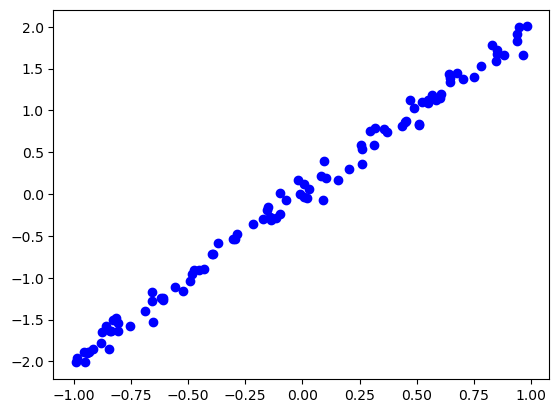

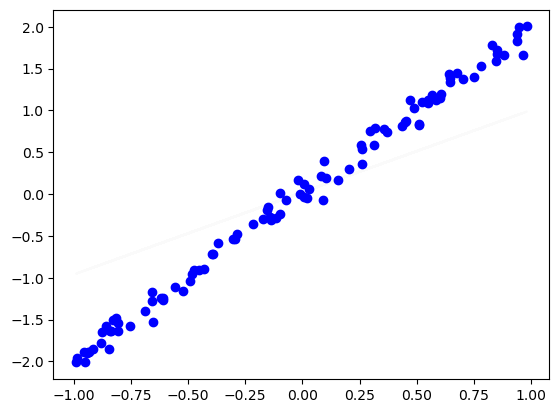

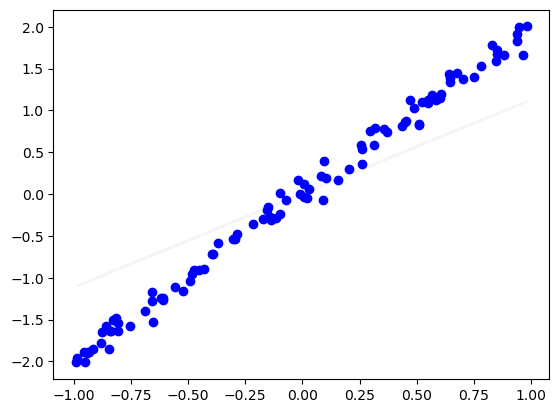

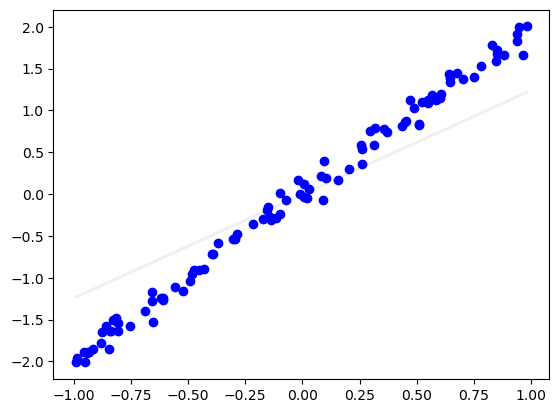

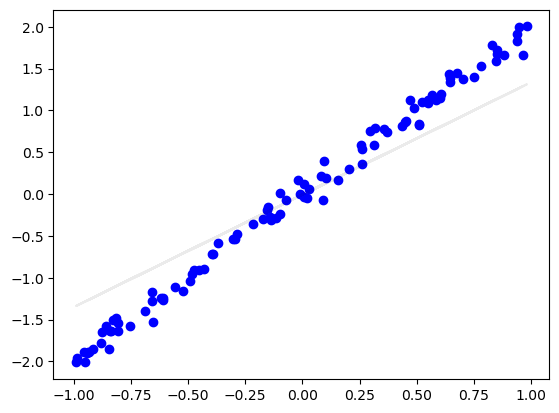

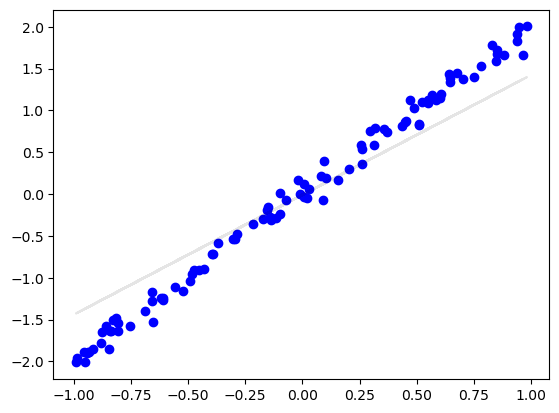

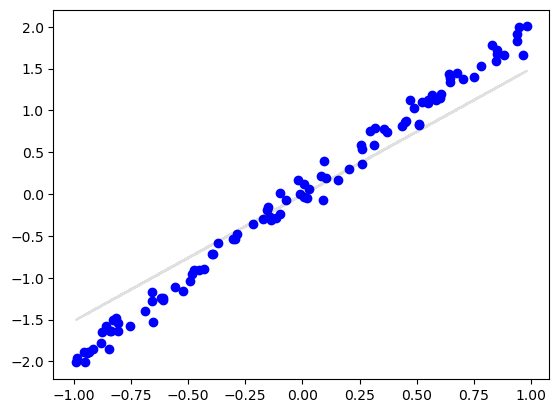

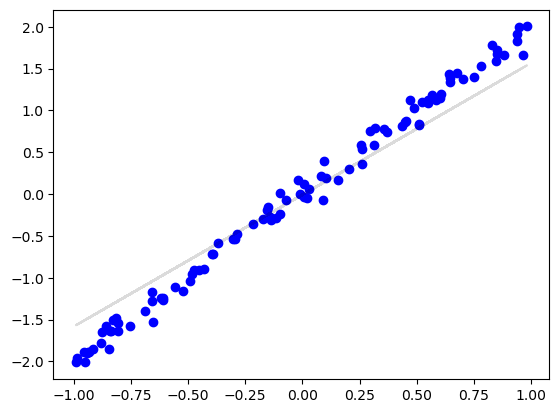

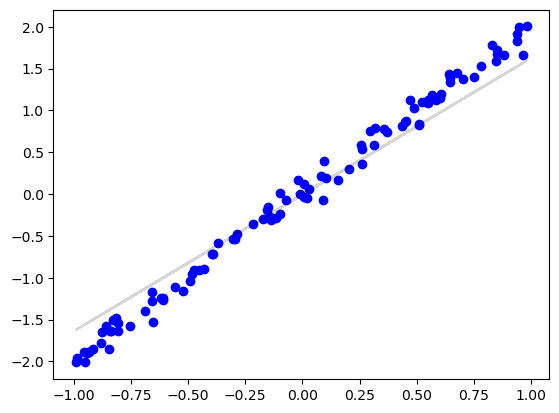

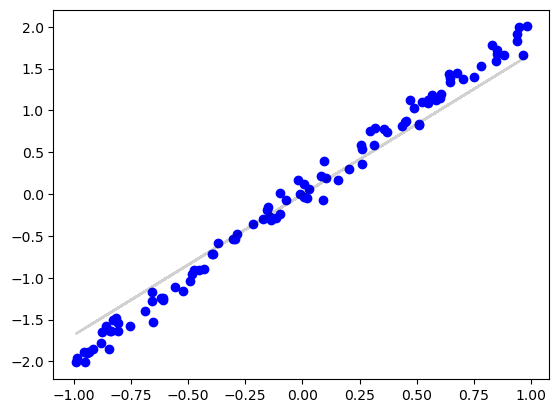

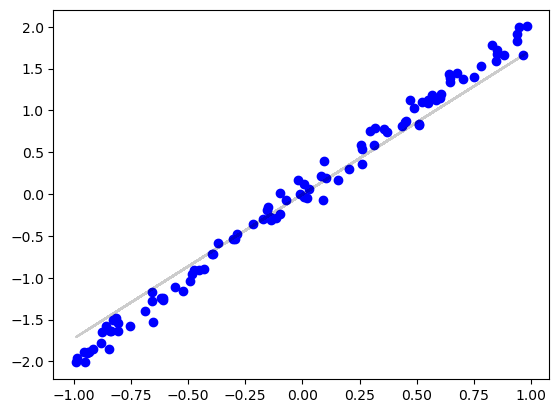

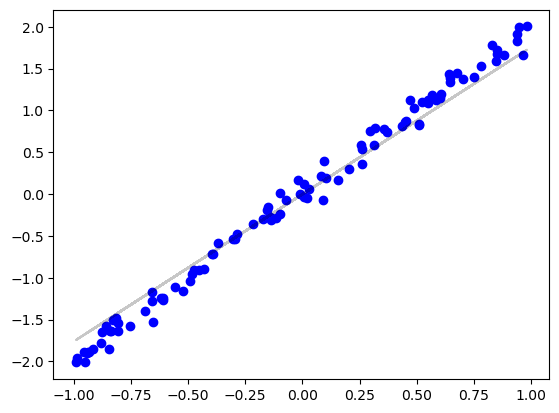

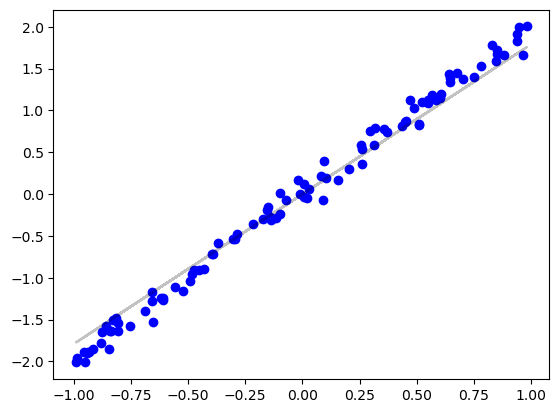

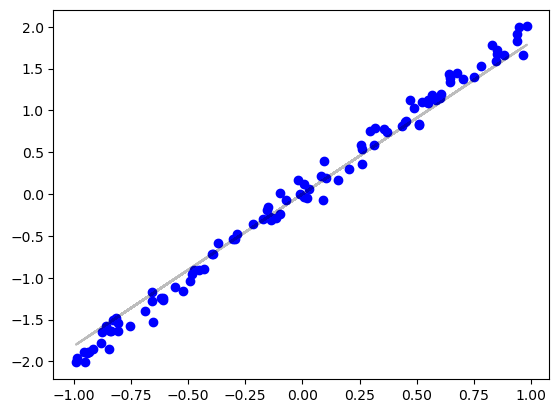

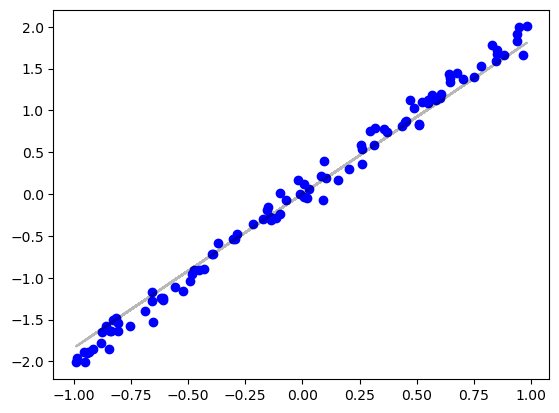

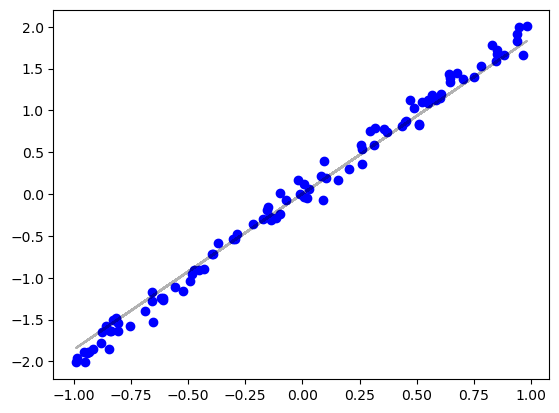

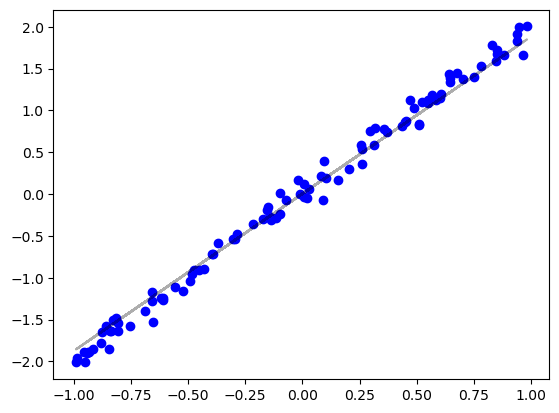

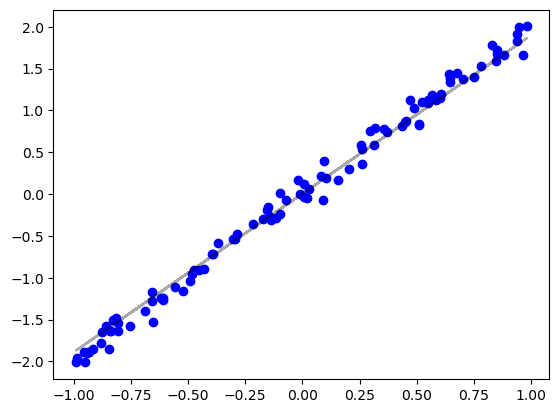

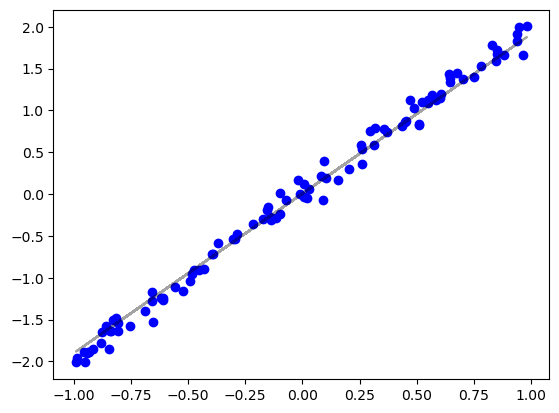

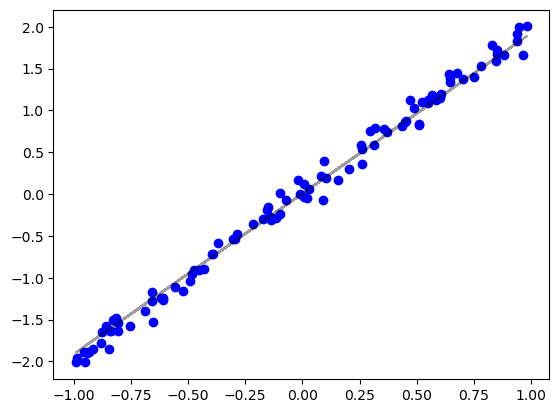

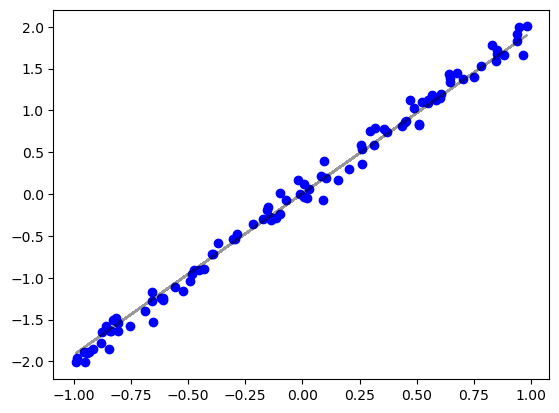

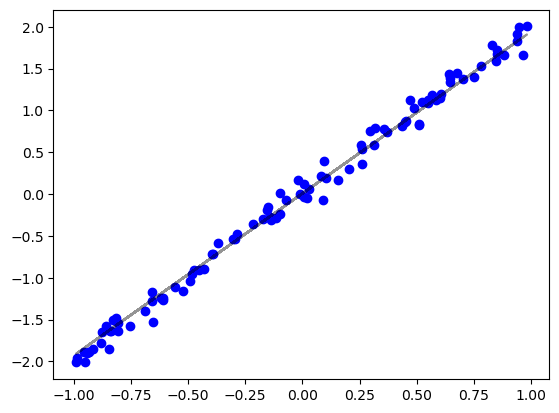

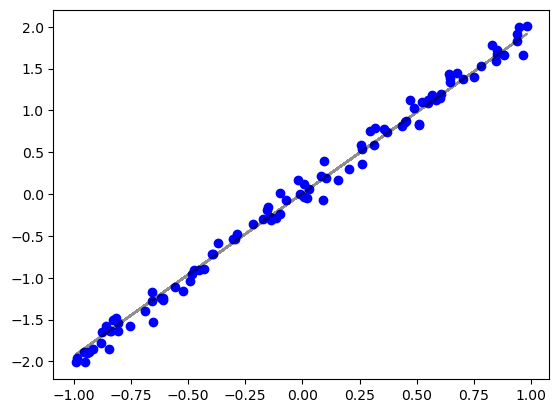

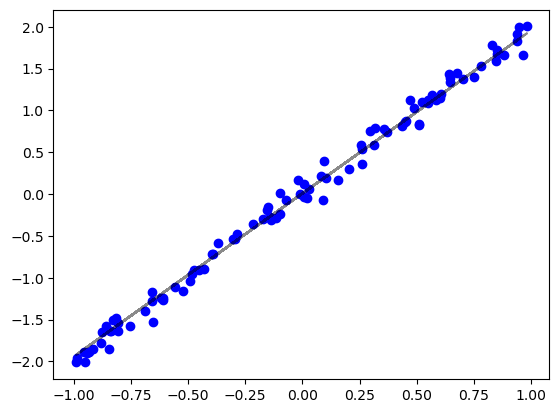

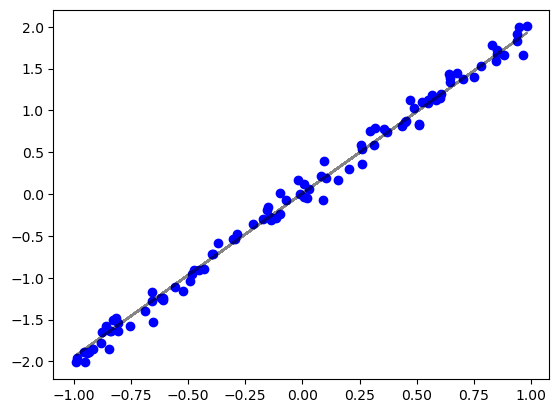

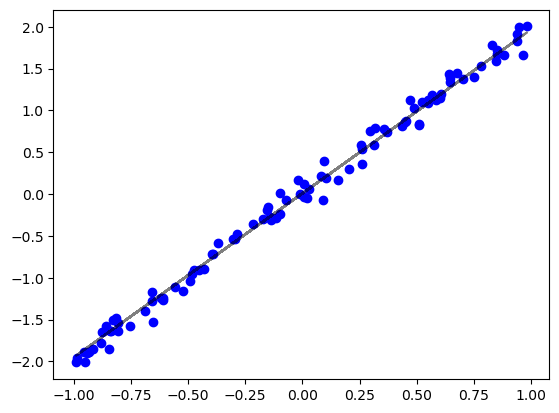

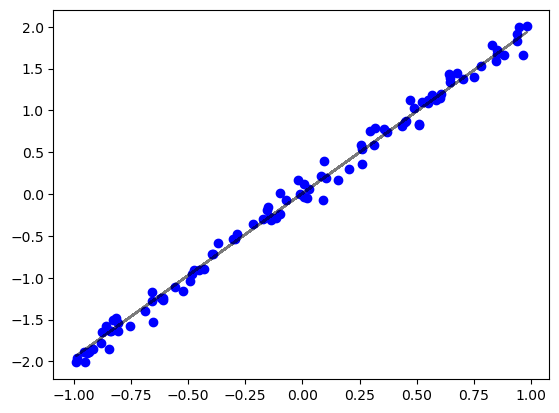

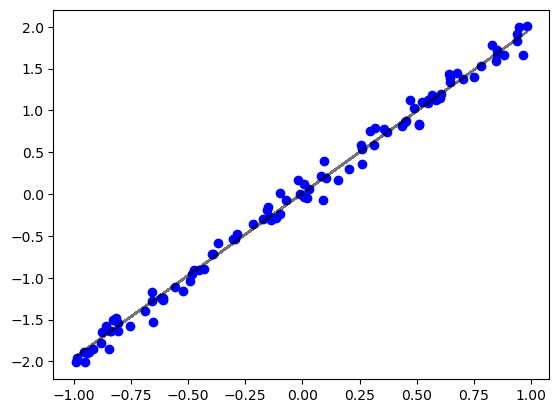

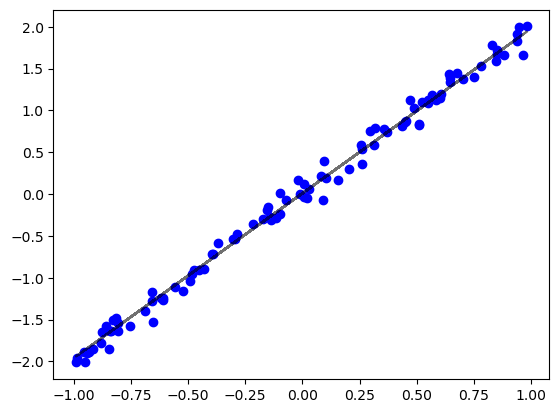

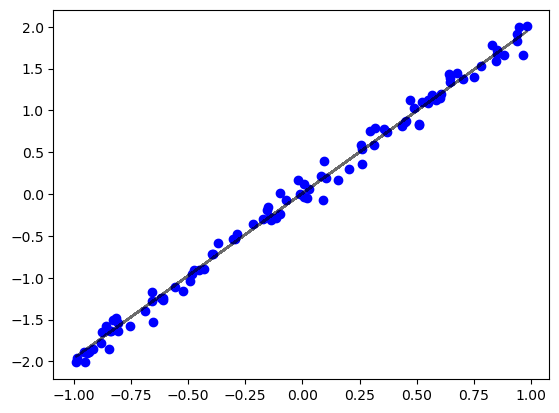

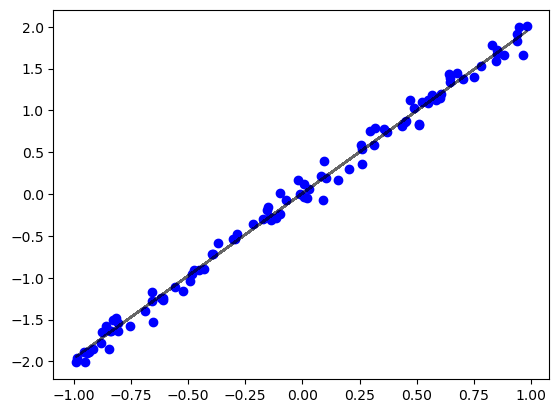

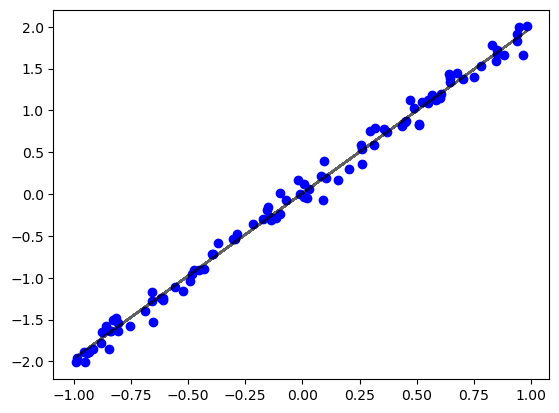

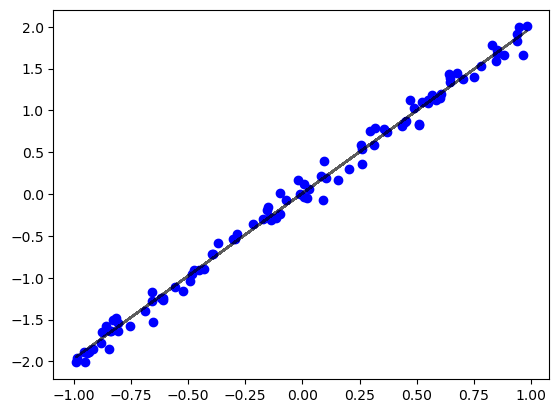

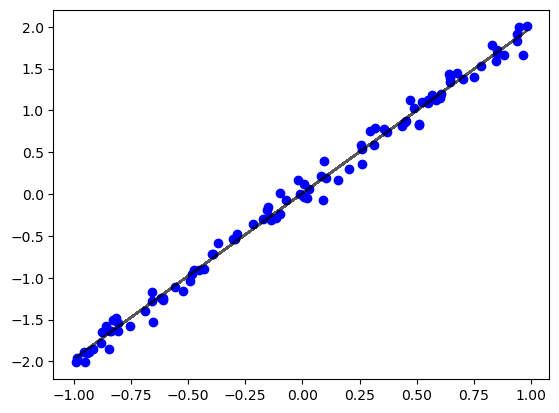

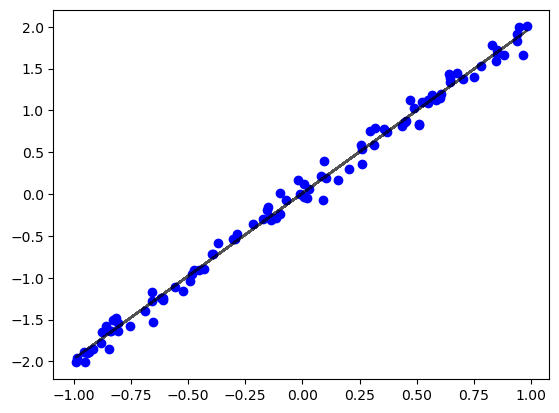

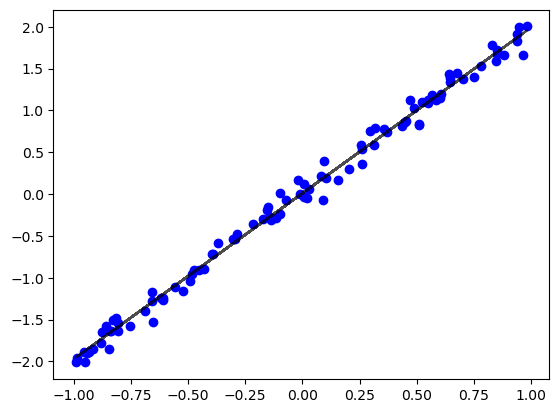

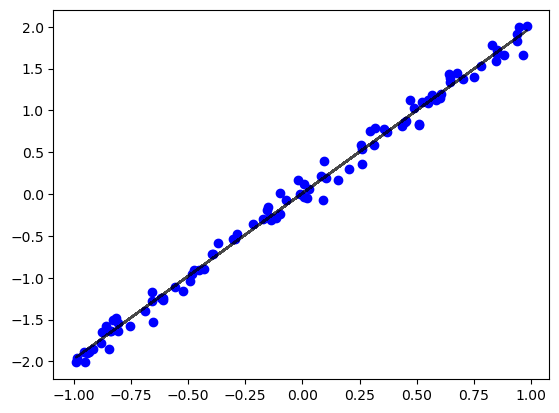

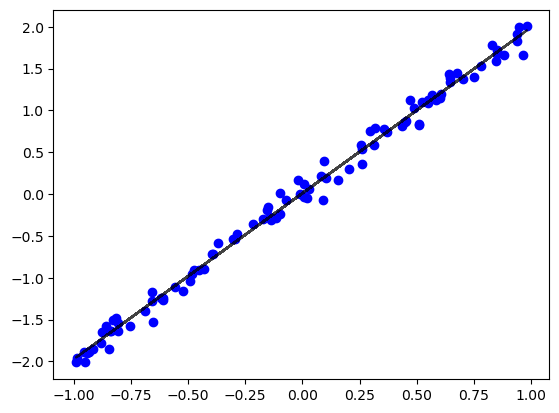

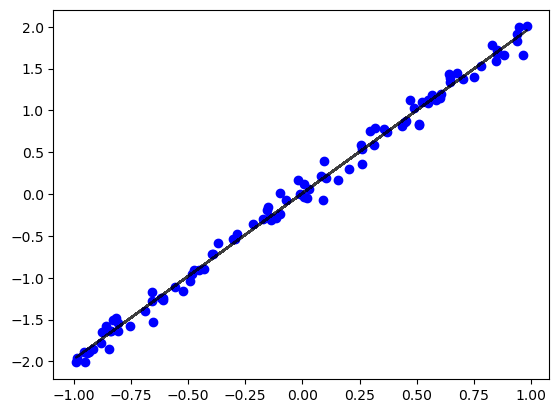

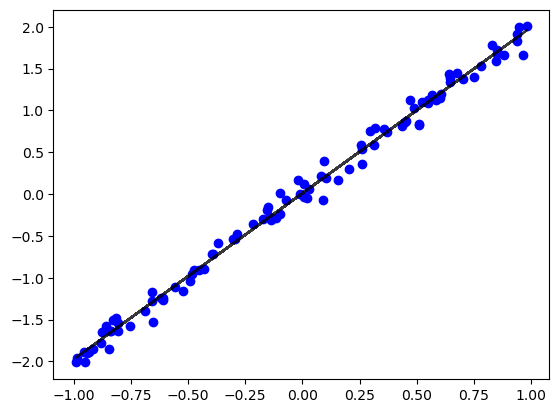

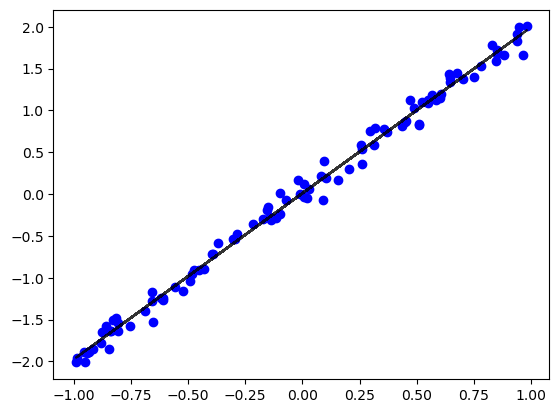

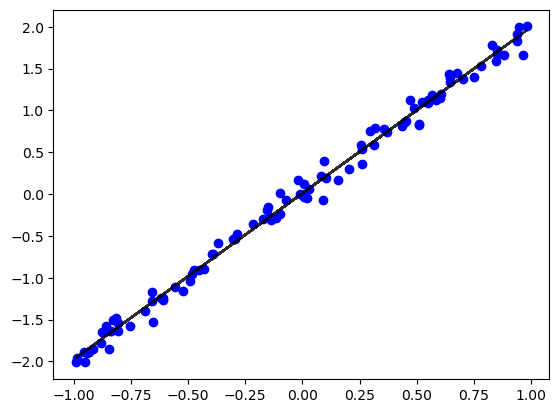

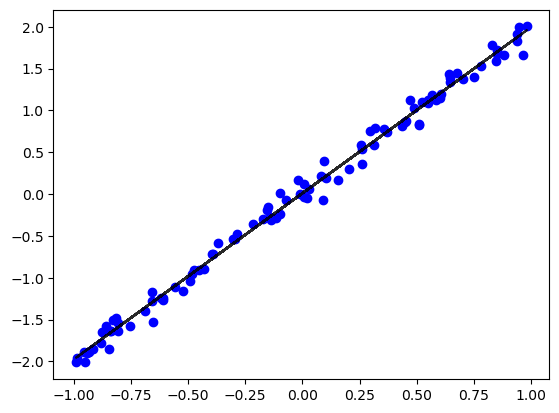

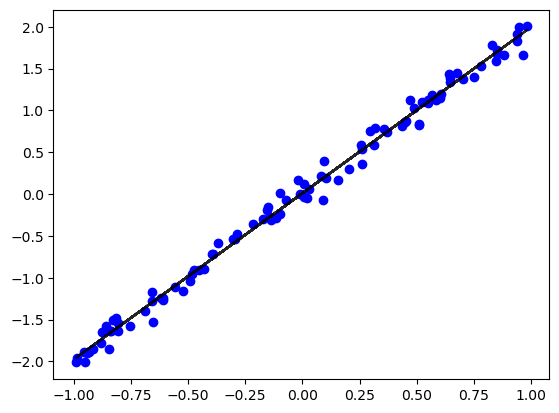

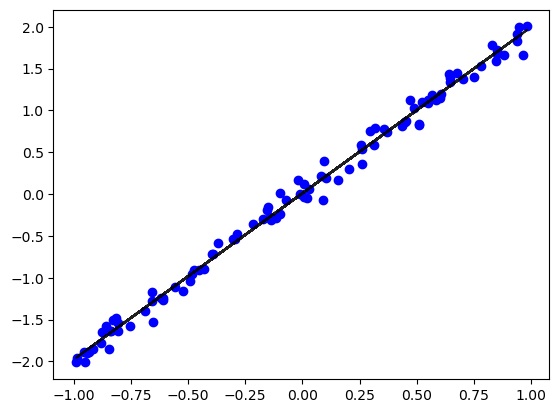

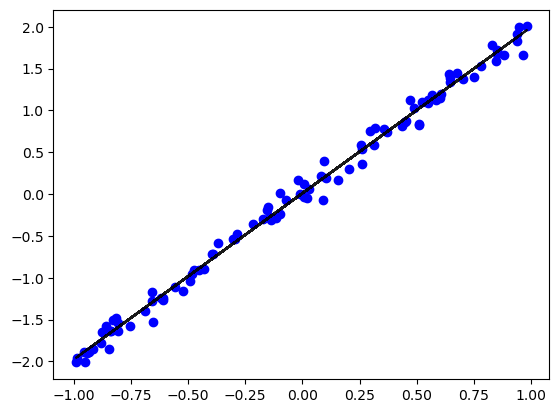

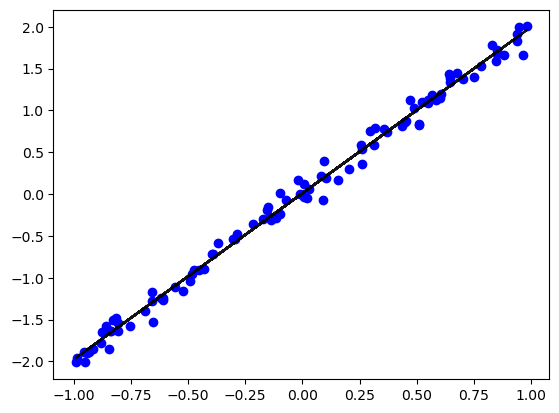

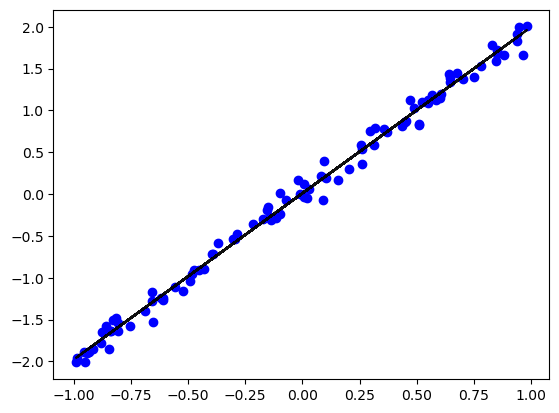

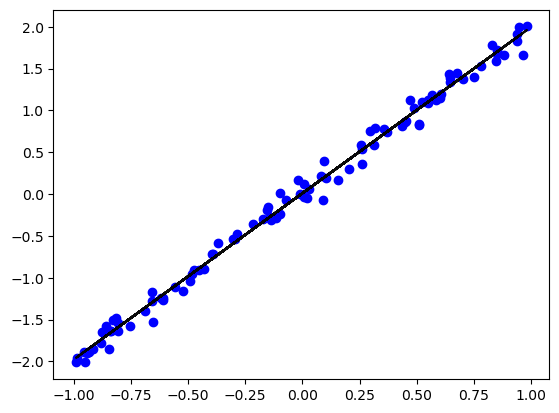

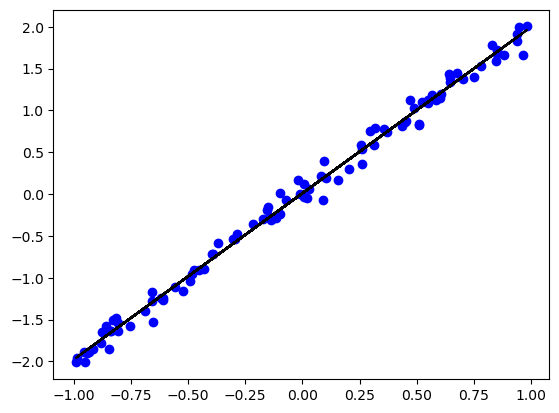

In [22]:
for epoch_i in range(n_epochs):
    with tf.GradientTape() as tape:
        y_pred = model(xs)
        loss = cost_function(ys, y_pred)
    gradients = tape.gradient(loss, [W,b])
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if epoch_i % 20 == 0:
        plt.plot(xs, model(xs), 'k', alpha=epoch_i/n_epochs)
        plt.scatter(xs, ys, color='blue')
        plt.show()